In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def Heaviside(n,epsilon,z):
    if n==1:
        if z> epsilon:
            return 1
        if z<-epsilon:
            return 0
        else:
            return (1/2)*(1+z/epsilon+np.sin(np.pi*z/epsilon)/np.pi)
    else:
        return (1/2)*(1+(2/np.pi)*(np.arctan(z/epsilon)))

In [3]:
def front(u):
    [M,N]=u.shape
    yP=np.zeros((M,N))
    xP=np.zeros((M,N))
    #yP=u
    #xP=u
    yP[2:M-1,2:N-1] =  u[2:M-1,3:N]   -u[2:M-1,2:N-1];
    xP[2:M-1,2:N-1] =  u[3:M,2:N-1]   -u[2:M-1,2:N-1];
    return yP,xP

def back(u):
    [M,N]=u.shape
    yM=np.zeros((M,N))
    xM=np.zeros((M,N))
    #yM=u
    #xM=u
    xM[2:M-1,2:N-1] = -u[1:M-2,2:N-1] + u[2:M-1,2:N-1];
    yM[2:M-1,2:N-1] = -u[2:M-1,1:N-2] +u[2:M-1,2:N-1];
    return yM,xM

In [4]:
def ActiveContour (phi, img,MIter, mu, nu, epsilon,lambda1,lambda2,t,h,ea):
    if img.T.shape[0]==3:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        [M,N]=img.shape
    if phi.T.shape[0]==3:
        phi=cv2.cvtColor(phi,cv2.COLOR_BGR2GRAY)

        
   # phi=cv2.resize(phi, (N,M), interpolation = cv2.INTER_AREA)
    [M,N] = img.shape 
    Dirac=1
    
    plt.figure()
    plt.imshow(Image),plt.xticks([]), plt.yticks([])  
    plt.contour(phi,[0])
    plt.show(block=False)  
    Energy=[0]
    for i in range(MIter):
        Yp, Xp = front(phi) 
        Ym, Xm = back(phi)
    
        term_1 = Xp/(np.sqrt((Xp/h)**2 + ((Yp+Ym)/2*h)**2) + 1e-5)
        term_2 = Yp/(np.sqrt((Yp/h)**2 + ((Xp+Xm)/2*h)**2) + 1e-5)  
    
        Yp_term_1,Xp_term_1 = front(term_1)
        Yp_term_2,Xp_term_2 = front(term_2) 
    
        Ym_term_1,Xm_term_1 = back(term_1)
        Ym_term_2,Xm_term_2 = back(term_2)
    
        C1 = np.sum(Heaviside(epsilon,h,phi)*img)/ np.sum(Heaviside(epsilon,h,phi))
        C2 = np.sum((1-Heaviside(epsilon,h,phi))*img)/ np.sum(1-Heaviside(epsilon,h,phi))
    
        first_term  = Xm_term_1 
        second_term = Ym_term_2
    
    
        length=first_term+second_term

    
        fidelity  = - nu - lambda1 * (img - C1)**2 + lambda2 * (img - C2)**2
    
        #plt.contour(phi,[0],color='k',linewidth=2)
        S=np.sum(phi)
        
        phi = phi + t*Dirac*( (mu/h**2)*length  + fidelity) 
        
        
        d=np.sum(np.abs(back(phi)))/MIter
        EF=np.abs(d-np.abs(back(phi)))
        EF=EF/np.max(EF)
        
        ES=np.abs(np.sum(back(phi)+front(phi)))
        ES=ES/np.max(ES)
        
        ET=np.min(phi)-np.min(back(phi))
        ET=ET/(np.max(phi)-np.min(phi))
        
        S2=np.log(np.sum(EF+ES+ET))
        Energy.append(S2) 
        
        S1=np.sum(phi)
        
        #ax.scatter(i,np.sum(img-phi))
        if S==S1:
            break;
        if i % (MIter/ea) == 0: 
            K = cv2.flip(phi, 0)
#            plt.figure()
#            plt.contour(phi)
            plt.figure()
            plt.contour(K,[0],cmap='gray') ,plt.xticks([]), plt.yticks([])
            plt.draw(),plt.show(block=False)
            
    for i in range(MIter):
        plt.scatter(i,Energy[i+1])

phi9=cv2.imread('circle.png')
phi9=cv2.cvtColor(phi9,cv2.COLOR_BGR2GRAY)
fy,fx=front(phi9)
by,bx=back(phi9)

plt.imshow(bx)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app


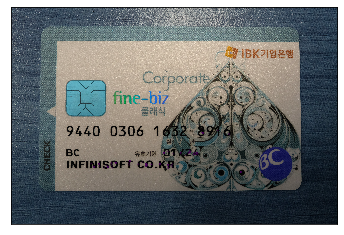

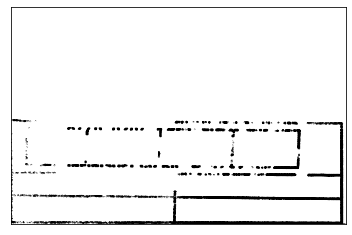

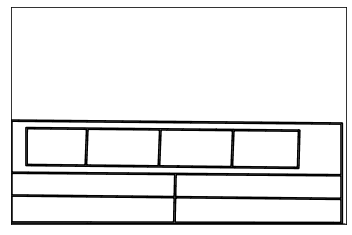

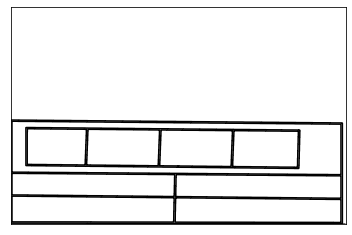

KeyboardInterrupt: 

In [5]:
Image = cv2.imread('DSCF0001.JPG')

img = cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
noise = np.random.normal(0,20,img.shape)
#img = img+noise
[M,N]=img.shape

#phi0 = np.ones((M,N)) 
#phi0[int(M/5):int(4*M/5),int(N/5):int(4*N/5)]= -1 

phi0=cv2.imread('reference.png')
phi0=cv2.cvtColor(phi0,cv2.COLOR_BGR2GRAY)
phi0=cv2.resize(phi0, (N,M), interpolation = cv2.INTER_AREA)
ActiveContour(img, phi0 , 1000, 1 , 0, 2,1,1,0.01,2,10)